## Linear noise approximation v.s exact chemical master equation
Consider following two systems :
$$
\begin{align}
(1)\;X_1 + X_2 &\xrightarrow{k_1} X_3  \quad X_3   \xrightarrow{k_0}  X_1 + X_2
\\
(2)\;X_1 + X_2 &\xrightarrow{k_1} X_3  \qquad X_3   \xrightarrow{k_0}  X_1 + X_2 \quad , \quad
\varnothing \xrightarrow{k_2}X_1 \qquad   X_1 \xrightarrow{k_3}\varnothing
\end{align}
$$

We set $k_0 = 0.1 \; , \; k_1 = 1  , X_1(0)=X_2(0)=10 , X_3(0)=50 $  and the system size $\Omega = 1$ .
The following is to compare steady state mean and covariance(only for the second system ) given by CME and LNA 
each system respectively .

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
import scipy
import scipy.stats as stats

## First system

In [3]:
# rate setting
k1= 1
k0 =0.1

t=0
#time index for jump
t_end= 10000

#initial state
X1_ini = 10 
X2_ini = 10 
X3_ini = 50 


In [180]:
def R_1(k0,k1,X1_ini,X2_ini,X3_ini ) :
    
    
    X1 = X1_ini
    X2 = X2_ini
    X3 = X3_ini
    
    #from 0 to t_end
    t_array =  np.zeros(t_end+1 )
    X1_array = np.zeros(t_end+1 )
    X2_array = np.zeros(t_end+1)
    X3_array = np.zeros(t_end+1)
    
    
    j=0
    X1_array[j] = X1
    X2_array[j] = X2
    X3_array[j] = X3
    #start the process
  
    t=0
    while j <= t_end :
        #print(j)
       
        a = [k0*X3 , k1*X1*X2 ]
        a0 = sum(a)
        r1 , r2 = np.random.rand(2)
        
        while r1 ==0: 
            r1 = np.random.rand(1)
            
        t_next = (1/a0)*(  np.log(1/r1))
        t = t + t_next
        while j < t and j <= t_end: 
            t_array[j] = j
            X1_array[j] = X1
            X2_array[j] = X2
            X3_array[j] = X3
            j = j+1
            
        i = 0
        mu = 0
        amu = 0 
        while amu < r2*a0 :
            mu = mu + 1
            amu = amu + a[i]
            i = i+1
        
        if mu == 1:
            X1 = X1+1
            X2 = X2+1
            X3 = X3-1
        elif mu ==2 :
            X1 = X1-1
            X2 = X2-1
            X3 = X3+1
        
    return   X1_array , X2_array , X3_array 

### Rate equation
The rate equation for the system is given by
\begin{equation}
\frac{d}{dt} \phi_1 = \frac{d}{dt} \phi_2 = -\frac{d}{dt} \phi_3  = -  k_1 \phi_1 \phi_2 + k_0 \phi_3
\end{equation}

In [12]:
def avg_LNA_1(k0,k1,X1_ini,X2_ini,X3_ini):
    def f(v ,t):
        x1,x2,x3 = v
        return -k1*x1*x2 + k0*x3 , -k1*x1*x2 + k0*x3  , k1*x1*x2 - k0*x3 
    tspan = np.arange(t_end +1 )
   
    return  sci.odeint( f , ( X1_ini,X2_ini,X3_ini) , tspan)

### Mean comparison 
Here we compare the steady state mean by CME , LNA (rate equation)  . Since the system will converge to the
stationary distribution , here we approximate the mean at steady state by $E(X_i(t))$ for large $t$ ( run the simulation 1000 times , collect the last value and average over them ) . A better way is to use the ergodicity to approximate the mean but the execution time will be very long .

In [361]:
'run the simulations 2000 times and compute the sample mean ' 
def data_CME(k0,k1,X1_ini,X2_ini,X3_ini ) :
    X_1 = np.zeros(2000 , dtype = float)
    X_2 = np.zeros(2000 , dtype = float)
    X_3 = np.zeros(2000 , dtype = float)
    X1_realization_1 = np.zeros((2000 , t_end+1) , dtype = float )
    X2_realization_1 = np.zeros((2000,t_end+1) , dtype = float)
    X3_realization_1 = np.zeros((2000,t_end+1) , dtype = float)

    
    for i in range(2000):   
        print(i)
        X1_realization_1[i,:] , X2_realization_1[i,:] , X3_realization_1[i,:] = R_1(k0,k1,X1_ini,X2_ini,X3_ini)
        
        X_1[i] = X1_realization_1[i,-1]
        X_2[i] = X2_realization_1[i,-1]
        X_3[i] = X3_realization_1[i,-1] 
        
        
    return np.average(X_1) ,  np.average(X_2) ,  np.average(X_3) ,  X1_realization_1 , X2_realization_1 , X3_realization_1

In [ ]:
m1_1 , m2_1 ,m3_1 ,  X1_realization_1 ,  X2_realization_1 ,  X3_realization_1= data_CME(k0,k1,X1_ini,X2_ini,X3_ini)

In [ ]:
"The steady state mean "
m_LNA_1 = avg_LNA_1(k0,k1,X1_ini,X2_ini,X3_ini)
m1_1 = m1_1*np.ones(t_end+1)
m2_1 = m2_1*np.ones(t_end+1)
m3_1 = m3_1*np.ones(t_end+1)

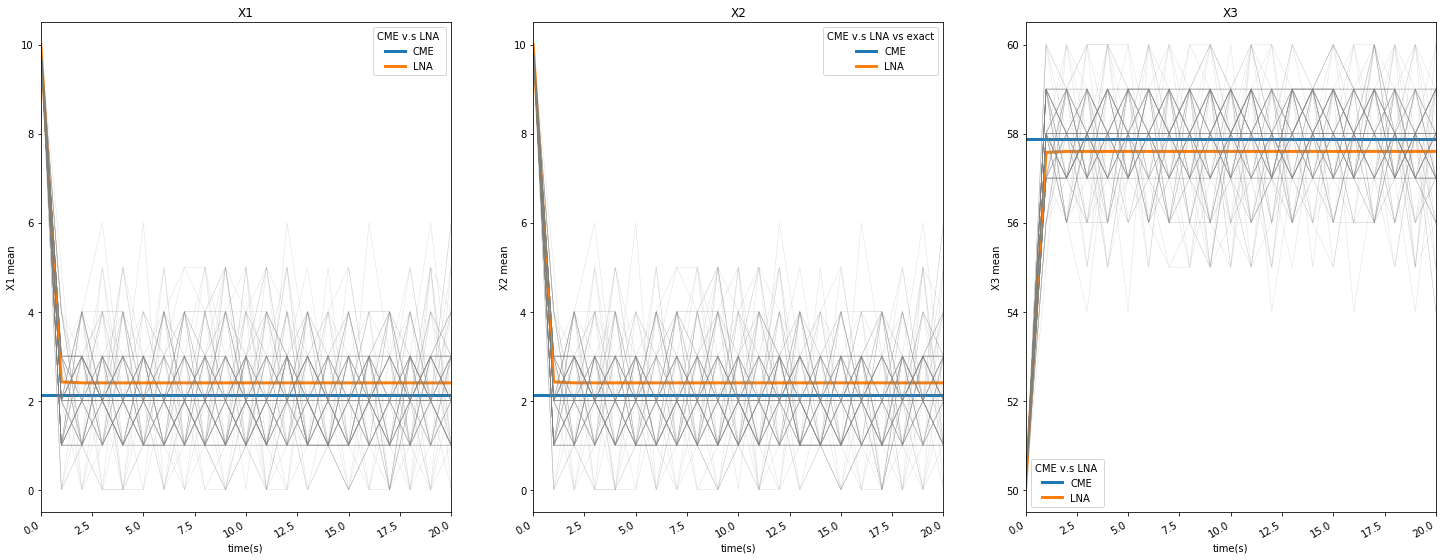

In [368]:

fig , ax = plt.subplots(1,3 ,  figsize=(25,10))


ax[0].set_title("X1")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('X1 mean')


ax[0].plot(  m1_1 ,   label = "CME" , linewidth =3 )
ax[0].plot(  m_LNA_1[:,0]   , label = "LNA"  , linewidth =3 )
ax[0].legend(title = "CME v.s LNA ") 
ax[0].set_xlim(0,20)

ax[1].set_title("X2")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('X2 mean')

ax[1].plot(m2_1 , label = "CME" , linewidth =3 )
ax[1].plot( m_LNA_1[:,1] , label = "LNA" ,  linewidth =3)
ax[1].legend(title = "CME v.s LNA vs exact") 
ax[1].set_xlim(0,20)

ax[2].set_title("X3")
ax[2].set_xlabel('time(s)')
ax[2].set_ylabel('X3 mean')

ax[2].plot(m3_1, label = "CME" , linewidth =3)
ax[2].plot(m_LNA_1[:,2]  , label = "LNA" ,  linewidth =3)
ax[2].legend(title = "CME v.s LNA ") 
ax[2].set_xlim(0,20)
for i in range(0,2000,20):
    ax[0].plot(  X1_realization_1[i,:] , color='grey' , linewidth =0.6 , alpha =0.2)
    ax[1].plot(  X2_realization_1[i,:] , color='grey' , linewidth =0.6 , alpha =0.2)
    ax[2].plot(  X3_realization_1[i,:] , color='grey' , linewidth =0.6 , alpha =0.2)
fig.autofmt_xdate()


In [ ]:
m1_1[0] , m2_1[0] ,m3_1[0] , m_LNA_1[-1] , 1- m1_1[0] /m_LNA_1[-1,0]

The grey lines are 100 sample-pathes for each species .
We see that solutions of rate equation converge quickly to steady states , but the values seem to be different from
the approximated steady state mean given by CME . 

## Second system


In [4]:
k2=1
k3=1
t=0
t_end= 10000


In [5]:
def R_2(k0,k1,k2,k3,X1_ini,X2_ini,X3_ini ) :

    X1 = X1_ini
    X2 = X2_ini
    X3 = X3_ini
  
    t_array = np.zeros(t_end +1 )
    X1_array = np.zeros( t_end+1)
    X2_array = np.zeros(t_end+1 )
    X3_array = np.zeros( t_end+1 )
   
    j=0
    X1_array[j] = X1
    X2_array[j] = X2
    X3_array[j] = X3
  
    t=0
    
    while j <= t_end :

        a = [k0*X3 , k1*X1*X2 , k2 , k3*X1 ]
        a0 = sum(a)

        r1 , r2 = np.random.rand(2)

        while r1 ==0:
            r1 = np.random.rand(1)
            
        t_next = (1/a0)*( np.log(1/r1))
        t = t + t_next
        
        while j < t and j <= t_end : 
            t_array[j] = j
            X1_array[j] = X1
            X2_array[j] = X2
            X3_array[j] = X3
            j = j+1
            
        i = 0
        mu = 0
        amu = 0 
        while amu < r2*a0 : 
            mu = mu + 1
            amu = amu + a[i]
            i = i+1
     
        if mu == 1:
            X1 = X1+1
            X2 = X2+1
            X3 = X3-1
        elif mu ==2 :
            X1 = X1-1
            X2 = X2-1
            X3 = X3+1
        elif mu == 3 :
            X1 = X1+1
        elif mu == 4 :
            X1= X1-1
    
    return   X1_array , X2_array , X3_array 

### Rate equation
The rate equation for the system is given by
\begin{equation}
\frac{d}{dt} \phi_1 =  -  k_1 \phi_1 \phi_2 + k_0 \phi_3 +k_2 - k_3 \phi_1
\qquad
\frac{d}{dt} \phi_2 = -\frac{d}{dt} \phi_3  = -  k_1 \phi_1 \phi_2 + k_0 \phi_3
\end{equation}


In [6]:
def avg_LNA_2(k0,k1,k2,k3 , X1_ini,X2_ini,X3_ini):
    def f(v ,t):
        x1,x2,x3 = v
        return -k1*x1*x2 + k0*x3 +k2 - k3*x1 , -k1*x1*x2 + k0*x3  , k1*x1*x2 - k0*x3 
    tspan = np.arange( t_end+1 )
   
    return  sci.odeint( f , ( X1_ini,X2_ini,X3_ini) , tspan)

### Mean and covariance Comparison
Here we compare the steady state expected value by CME , LNA using the same method as the preceding .

In [7]:
'run the simulations 2000 times and compute all statics needed later' 
def data_CME2(k0,k1,k2,k3 , X1_ini,X2_ini,X3_ini ) :

    X1_realization_2 = np.zeros((2000,t_end+1) )
    X2_realization_2 = np.zeros((2000,t_end+1) )
    X3_realization_2 = np.zeros((2000,t_end+1) )
    for i in range(2000):
        
        print(i)
        X1_realization_2[i,:] , X2_realization_2[i,:] , X3_realization_2[i,:] = R_2(k0,k1, k2 ,k3 ,X1_ini,X2_ini,X3_ini )
   
    m1_2 = np.average( X1_realization_2[:,-1])
    m2_2 = np.average( X2_realization_2[:,-1])
    m3_2 = np.average( X3_realization_2[:,-1])
    cov_CME_2 =np.cov( ( X1_realization_2[i,:] , X2_realization_2[i,:] , X3_realization_2[i,:]))
    return m1_2  ,  m2_2 ,  m3_2 , cov_CME_2 ,  X1_realization_2, X2_realization_2 , X3_realization_2

In [ ]:
m1_2  ,  m2_2 ,  m3_2 , cov_CME_2,  X1_realization_2, X2_realization_2 , X3_realization_2 = data_CME2(k0,k1,k2,k3 ,X1_ini,X2_ini,X3_ini )

The paper predicts that the first species should follows Poisson distribution with rate $\frac{k_2}{k_3} = 1$ , in particular
$\langle X_1 \rangle = \langle X_1^2 \rangle -\langle X_1 \rangle^2$ and it will also uncorrelated with $X_2$ and $X_3$ .
The following checks whether the simulation results is consistent with the assertion . 

In [10]:
print('The ratio between mean and variance is' , m1_2/cov_CME_2[0,0] , ' and the covariance of X1 with X2 and X3 are' , cov_CME_2[0,1] , ',',cov_CME_2[0,2] )

The ratio between mean and variance is 0.9757254742925975  and the covariance of X1 with X2 and X3 are -0.012268753124687636 , 0.012268753124687636


Also we plot the empircal distribution for the distribution and compare with the value Poisson distribution (from 0 to 7) .
The bars correspond to the normalized empirical samples and red dashed line are the exact value of Poisson distribution .

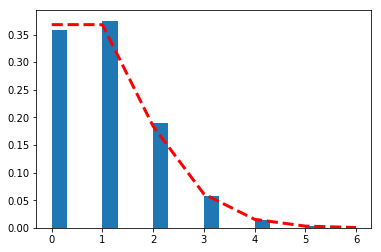

In [11]:
'list all uniqune value in X1_realization_2[:,-1]'
bins= np.unique(X1_realization_2[:,-1])

Poi = np.array( [stats.poisson.pmf(n , 1) for n in bins])

fig , ax = plt.subplots()

ax.hist(  X1_realization_2[:,-1] , bins = bins , width=0.3 , density = True)
ax.plot(bins, Poi , 'r--', linewidth = 3 )

In [12]:
m1_2 = m1_2 *np.ones(t_end+1)
m2_2 = m2_2 *np.ones(t_end+1)
m3_2 = m3_2 *np.ones(t_end+1)

In [13]:
"The steady state mean "
m_LNA2 = avg_LNA_2(k0 ,k1 , k2 ,k3 ,X1_ini ,X2_ini , X3_ini  )
m1_2[0] , m2_2[0] , m3_2[0] , m_LNA2[-1]

(1.0045, 5.53, 54.47, array([ 1.        ,  5.45454545, 54.54545455]))

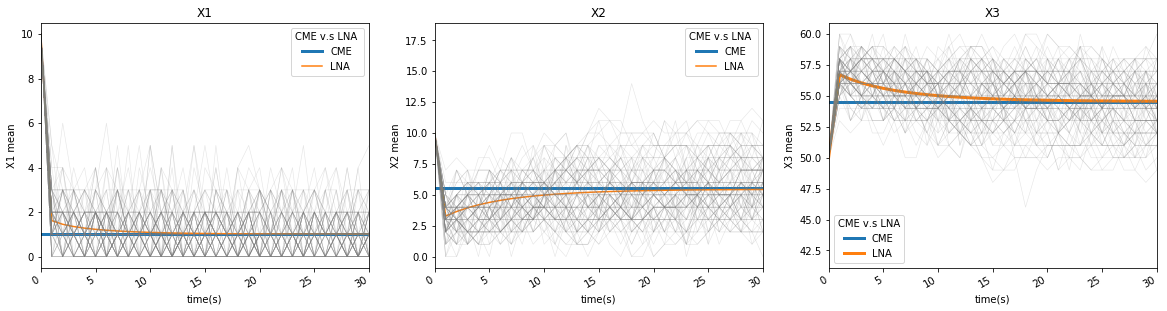

In [16]:
'plot the results'

fig , ax = plt.subplots(1,3 ,  figsize=(20,5))


ax[0].set_title("X1")
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('X1 mean')

ax[0].plot(  m1_2, label = "CME" , linewidth =3 )
ax[0].plot(  m_LNA2[:,0]   , label = "LNA"  )
ax[0].legend(title = "CME v.s LNA ") 
ax[0].set_xlim(0,30)

ax[1].set_title("X2")
ax[1].set_xlabel('time(s)')
ax[1].set_ylabel('X2 mean')

ax[1].plot(m2_2 , label = "CME" , linewidth =3 )
ax[1].plot( m_LNA2[:,1] , label = "LNA" )
ax[1].legend(title = "CME v.s LNA ") 
ax[1].set_xlim(0,30)

ax[2].set_xlim(0,30)
ax[2].set_title("X3")
ax[2].set_xlabel('time(s)')
ax[2].set_ylabel('X3 mean')

ax[2].plot( m3_2 ,label = "CME" , linewidth =3 )
ax[2].plot(m_LNA2[:,2]   , label = "LNA" ,  linewidth =3.0)
ax[2].legend(title = "CME v.s LNA") 
ax[2].set_xlim(0,30)

for i in range(0,2000 , 20):
    ax[0].plot(  X1_realization_2[i,:] , color='grey' , linewidth =0.6 , alpha =0.2)
    ax[1].plot(  X2_realization_2[i,:] , color='grey' , linewidth =0.6 , alpha =0.2)
    ax[2].plot(  X3_realization_2[i,:] , color='grey' , linewidth =0.6 , alpha =0.2)
fig.autofmt_xdate()


Same as the previous , the grey lines are 100 sample-pathes for each species .
Now in this case the mean given by CME and LNA  seem to match unlike the first system .

### Covariance comparison
Covariance matrix $C$ of $X_2$ and $X_3$ at the steady state given by LNA  is the solution of  Lyapunov matrix equation :
$$
\begin{equation}
\frac{d}{dt} C = AC + CA^T -BB^T =0
\end{equation}
$$
with 
$$
\begin{equation}
A=\begin{pmatrix}
 k_1 \phi_1    &    -k_0     \\
-k_1 \phi_1    &     k_0     
\end{pmatrix}
\qquad
BB^T =\begin{pmatrix}
 k_1\phi_1\phi_2+k_3\phi_3   & -(k_1\phi_1\phi_2+k_3\phi_3)      \\
 -(k_1\phi_1\phi_2+k_3\phi_3) &  k_1\phi_1\phi_2+k_3\phi_3        
\end{pmatrix}
\end{equation}
$$

In [17]:
A = np.array( [ [ k1*m_LNA2[-1,0]  ,  -k0 ] ,
                [ -k1*m_LNA2[-1,0]  , k0 ] 
              ])
a1 = k1*m_LNA2[-1,0]*m_LNA2[-1,1] + k0*m_LNA2[-1,2]
BB= np.array( [
                [ a1  , -a1 ] ,
                [ -a1  , a1 ] ])

cov_LNA_2 = scipy.linalg.solve_continuous_lyapunov(A,BB)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)


In [18]:
cov_LNA_2

array([[ 4.95867769, -4.95867769],
       [-4.95867769,  4.95867769]])

In [19]:
 cov_CME_2 [1:,1:]

array([[ 4.9571884, -4.9571884],
       [-4.9571884,  4.9571884]])

The covariance matrix of $X_2$ and $X_3$ given by CME and LNA also differ  small amount relative to the result values in each component .